In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [61]:
dataset = pd.read_csv('raw_data.csv', header=0, index_col=0)
dataset.head()
# Sentiment = percentile of posi

,VIX_lastday,Sentiment,VIX,VIX_nextday,num,nega,posi,sum,dVIX,fVIX,DV,DM,DN,DT
Day,,,,,,,,,,,,,,
21/1/2020,12.85,0.60,12.91,12.98,20,8,12,48,0.004669,0.005422,1,1,1,0
22/1/2020,12.91,0.39,12.98,14.56,28,17,11,44,0.005422,0.121726,1,0,0,1
23/1/2020,12.98,0.56,14.56,14.56,55,24,31,124,0.121726,0.000000,1,1,1,1
24/1/2020,14.56,0.48,14.56,14.56,44,23,21,84,0.000000,0.000000,0,0,0,0
25/1/2020,14.56,0.31,14.56,18.23,51,35,16,64,0.000000,0.252060,0,0,0,1


If we want to look at leading indicator, we drop the data when the next day is not a trading day and VIX doesn't change;

IF we want to look at lagging indicator, we drop the data when the current day is not atrading day and VIX doesn't chagne.

In [62]:
#dataset= dataset[dataset.dVIX != 0]
dataset= dataset[dataset.fVIX != 0]

Our plotting function

In [63]:
def runplt(x, y,yl):
    plt.figure()
    plt.title("predicted-actual value comparison")
    plt.xlabel("date point")
    if yl == 'VIX Value':
            plt.ylabel("VIX Value")
    elif yl == 'dVIX absolute value':
            plt.ylabel("dVIX absolute value")
    elif yl == 'dVIX percentile change':
            plt.ylabel("dVIX percentile change")
    
    plt.plot(range(len(x)),x,'b',label="predict")
    plt.plot(range(len(y)),y,'r',label="test")
    plt.legend(loc="upper right")
    plt.grid(True)
    return plt

First roughly take a look at the relations between dependent and independent variables 

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.close(fig=None)>

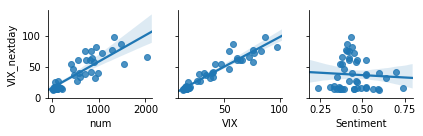

In [64]:
sns.pairplot(dataset,x_vars=['num','VIX','Sentiment'],y_vars='VIX_nextday',size=2,aspect=1,kind='reg')
plt.show
plt.close

Following are our results. We only show part of what we have tested, and most of the insignificant results have been dropped.

1. directly predict VIX

                            OLS Regression Results                            
Dep. Variable:            VIX_nextday   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     304.4
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           3.44e-20
Time:                        20:13:54   Log-Likelihood:                -101.96
No. Observations:                  32   AIC:                             209.9
Df Residuals:                      29   BIC:                             214.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6973      1.891      2.485      0.0

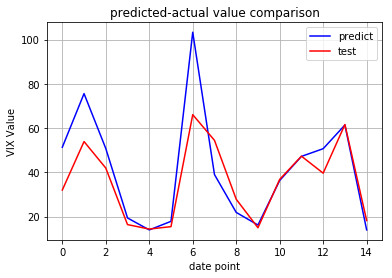

In [65]:
X=pd.DataFrame(dataset,columns=['VIX','num'])
y=dataset.VIX_nextday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

pred_value=model.params[0]+model.params[1]*X_test.VIX+model.params[2]*X_test.num
#+model.params[3]*X_test.Sentiment

# ---------- plot2
plt=runplt(pred_value,y_test, 'VIX Value')
# plt.plot(pred_value,y_test)
plt.show()

                            OLS Regression Results                            
Dep. Variable:            VIX_nextday   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     254.0
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           3.47e-16
Time:                        20:13:57   Log-Likelihood:                -115.45
No. Observations:                  32   AIC:                             234.9
Df Residuals:                      30   BIC:                             237.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2330      2.351      4.777      0.0

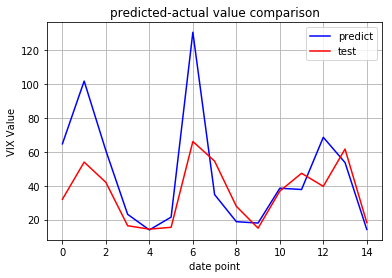

In [66]:
X=pd.DataFrame(dataset,columns=['num'])
y=dataset.VIX_nextday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

pred_value=model.params[0]+model.params[1]*X_test.num
#+model.params[3]*X_test.Sentiment

# ---------- plot2
plt=runplt(pred_value,y_test, 'VIX Value')
# plt.plot(pred_value,y_test)
plt.show()

2. The rate of daily change (leading)

                            OLS Regression Results                            
Dep. Variable:                   fVIX   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.4164
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.663
Time:                        20:13:58   Log-Likelihood:                 10.240
No. Observations:                  32   AIC:                            -14.48
Df Residuals:                      29   BIC:                            -10.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0135      0.047      0.287      0.7

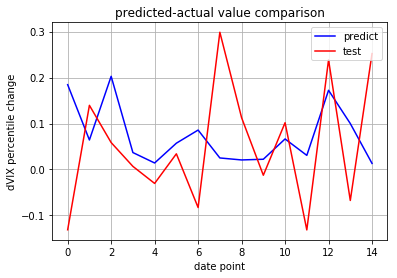

In [67]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.fVIX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX percentile change')
# plt.plot(pred_value,y_test)
plt.show()

3. Absolute change of VIX index (leading)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.138
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.334
Time:                        20:13:59   Log-Likelihood:                -112.64
No. Observations:                  32   AIC:                             231.3
Df Residuals:                      29   BIC:                             235.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9392      2.191     -0.429      0.6

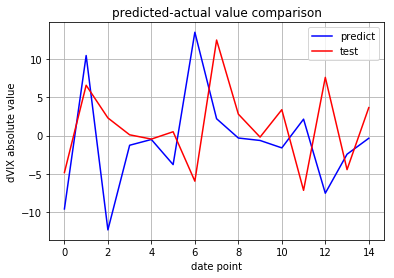

In [68]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.VIX_nextday - dataset.VIX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print (model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test,'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

Then we test lagging indicator

In [69]:
dataset = pd.read_csv('raw_data.csv', header=0, index_col=0)
dataset.head()
# Sentiment = percentile of 

dataset= dataset[dataset.dVIX != 0]

1. rate of daily change (lagging)

                            OLS Regression Results                            
Dep. Variable:                   dVIX   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8826
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.425
Time:                        20:14:01   Log-Likelihood:                 14.311
No. Observations:                  32   AIC:                            -22.62
Df Residuals:                      29   BIC:                            -18.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0211      0.042      0.498      0.6

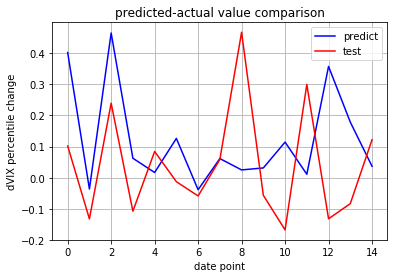

In [70]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.dVIX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX percentile change')
# plt.plot(pred_value,y_test)
plt.show()

2. absolute change of VIX (lagging) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.375
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.269
Time:                        20:14:02   Log-Likelihood:                -111.72
No. Observations:                  32   AIC:                             229.4
Df Residuals:                      29   BIC:                             233.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0836      2.179     -0.038      0.9

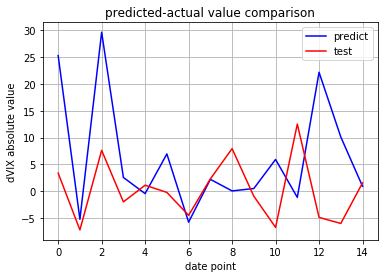

In [71]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

Finally, we test different proportion of training and testing data.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.2432
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.785
Time:                        20:14:02   Log-Likelihood:                -130.11
No. Observations:                  37   AIC:                             266.2
Df Residuals:                      34   BIC:                             271.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4745      2.114      0.224      0.8

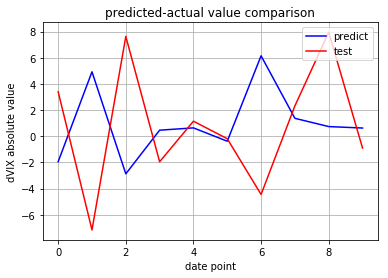

In [72]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.243
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.306
Time:                        20:14:03   Log-Likelihood:                -98.816
No. Observations:                  28   AIC:                             203.6
Df Residuals:                      25   BIC:                             207.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0957      2.344     -0.041      0.9

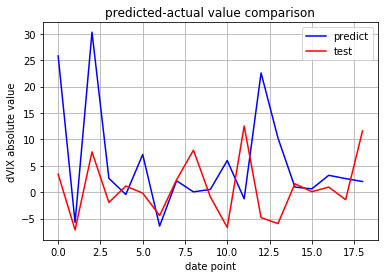

In [73]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.064
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.364
Time:                        20:14:03   Log-Likelihood:                -82.932
No. Observations:                  23   AIC:                             171.9
Df Residuals:                      20   BIC:                             175.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6085      2.865     -0.212      0.8

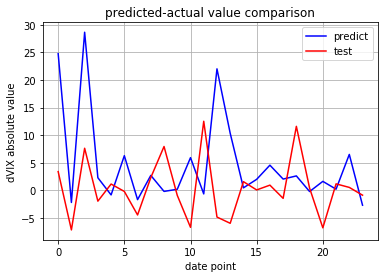

In [74]:
X=pd.DataFrame(dataset,columns=['num','nega'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.nega

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

In [75]:
# #P#L Curve
# statcompare.plot(x='datetime',y=['Sentiment_x','Sentiment_y'],logy=False).grid(axis='y')
# #P#L Curve
(statcompare
 .assign(MNBandLR=statcompare['Sentiment_x'])
 .assign(TextCNN=statcompare['Sentiment_y'])
 .plot(x='datetime',y=['MNBandLR','TextCNN'],logy=False).grid(axis='y')
)

NameError: name 'statcompare' is not defined